## Rotation Gates on Bloch Sphere

Rotation gates are the continuous counter parts to the Pauli gates. While Pauli gates perform _discrete flips_ of the qubit's state, rotation gates allow for _smooth, controllable rotations_ around $X, Y, Z$ axes of the Bloch sphere.

### 1. From Pauli to Rotation Gates

Pauli gates correspond to $180^\circ (\pi)$ rotations around one of Bloch sphere axes:
$$
   X = R_x(\pi), \quad Y = R_y(\pi), \quad Z = R_z(\pi) 
$$

Rotation gates generalise this idea. They introduce a parameter $\theta$ that defines how much the qubit rotates around a given axis. These gates are essential for continuous state control and appear everywhere in quantum algorithms.

### 2. General Form

All rotation gates follow the same exponential definition:

$$
    R_\alpha(\theta) = e^{-i\frac{\theta}{2}\sigma_\alpha}, \quad \alpha \in \{x, y, z\}
$$

Here:
- $ \sigma_\alpha $ is one of the Pauli matrices
- $ \theta $ is the rotation angle (in radians)

This form guarantees the resulting operator is _unitary_, preserving quantum state normalisation.


### 3. Matrix Representations

Let’s write them explicitly:

$$
    R_x(\theta) = 
    \begin{bmatrix} \cos(\tfrac{\theta}{2}) & -i\sin(\tfrac{\theta}{2}) \\
    -i\sin(\tfrac{\theta}{2}) & \cos(\tfrac{\theta}{2})
    \end{bmatrix}
$$

$$
    R_y(\theta) =
    \begin{bmatrix}
    \cos(\tfrac{\theta}{2}) & -\sin(\tfrac{\theta}{2}) \\
    \sin(\tfrac{\theta}{2}) & \cos(\tfrac{\theta}{2})
    \end{bmatrix}
$$

$$
    R_z(\theta) =
    \begin{bmatrix}
    e^{-i\theta/2} & 0 \\
    0 & e^{i\theta/2}
    \end{bmatrix}
$$
Each one rotates the qubit around the corresponding Bloch axis.

### 4. Visualising Rotations

We can use Qiskit’s visualisation tools to observe how these rotations affect the qubit state.

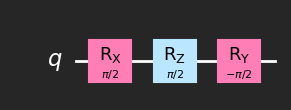

In [1]:
from qiskit import QuantumCircuit
from IPython.display import Math, Latex
import numpy as np

qc = QuantumCircuit(1)
qc.rx(np.pi/2, 0)  # rotation around X-axis by 90 degrees
qc.rz(np.pi/2, 0)  # rotation around Z-axis by 90 degrees
qc.ry(-np.pi/2, 0)  # rotation around Y-axis by 90 degrees

qc.draw('mpl', style='iqp-dark')

### 5. Bloch Sphere Animation

The following cell uses the same source as before — Qiskit’s `visualize_transition()` — to generate an interactive animation of the state evolution on the Bloch sphere.

In [7]:
from qiskit.visualization import visualize_transition
visualize_transition(qc, fpg=20, spg=1)

C:\Users\tan\AppData\Local\Temp\ipykernel_9336\3217475359.py:2: DeprecationWarning: The function ``qiskit.visualization.transition_visualization.visualize_transition()`` is deprecated as of Qiskit 1.2.0. It will be removed in the 2.0 release.
  visualize_transition(qc, fpg=20, spg=1)


Try changing the rotation angles to see how the qubit moves differently:
- $ \pi/4 $ → quarter rotation  
- $ \pi/2 $ → half rotation  
- $ \pi $ → full Pauli-style flip

### 6. Comparing to Pauli gates

Let’s confirm that a rotation by $\pi$ indeed gives us the Pauli gate:

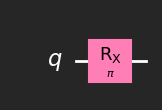

In [2]:
qc_pauli = QuantumCircuit(1)
qc_pauli.rx(np.pi, 0)
qc_pauli.draw('mpl', style='iqp-dark')

This operation is equivalent to the **Pauli-X gate**.  
Likewise:
- $ R_y(\pi) = Y $
- $ R_z(\pi) = Z $

This shows how Pauli gates are **special cases** of rotation gates.

### 7. Combining Rotations

Rotation gates can be chained to produce any single-qubit operation.  
For instance, a common decomposition uses all three rotations:

$$
U(\theta, \phi, \lambda) = R_z(\phi) R_y(\theta) R_z(\lambda)
$$

This is the foundation of the `u3` gate in Qiskit (now `U` in modern syntax).

### 8. Intuition

- $ R_x(\theta) $: rotates around the X-axis — affects **phase** and **superposition balance**  
- $ R_y(\theta) $: rotates around the Y-axis — changes **state amplitudes**  
- $ R_z(\theta) $: rotates around the Z-axis — changes **relative phase only**

By tuning $ \theta $, you can steer the qubit to any desired orientation on the Bloch sphere.


### 9. Summary

| Gate | Rotation Axis | Matrix Type | Example (θ = π) | Equivalent Gate |
|------|----------------|--------------|-----------------|-----------------|
| $ R_x(\theta) $ | X-axis | complex | $ R_x(\pi) $ | X |
| $ R_y(\theta) $ | Y-axis | real | $ R_y(\pi) $ | Y |
| $ R_z(\theta) $ | Z-axis | diagonal | $ R_z(\pi) $ | Z |

Rotation gates are the **building blocks of continuous quantum control** — allowing full manipulation of qubit states and forming the basis for all single-qubit unitaries.

### 10. References

- *Qiskit Textbook – Section 1.4: Single Qubit Gates*  
- *IBM Quantum Lab – Bloch Sphere Visualisation*  
- *Nielsen & Chuang – Chapter 4: Single Qubit Operations*

### $R_{\vec{n}}$ gate

$R_{\overrightarrow{n}}$ gate represents a rotation of $\theta$ radians anti-clockwise about an arbitrary unit axis $\overrightarrow{n} = (n_x, n_y, n_z)$ in the Bloch sphere. The general form of this gate is defined by the matrix exponential, where the axis $\overrightarrow{n}$ is incorporated as a linear combination of the Pauli operators $(X, Y, Z)$:
$$
    R_{\overrightarrow{n}} (\theta) = e^{-i \frac{1}{2} \theta (n_x X + n_y Y + n_z Z)} 
$$
This exponential can be expanded using Euler's formula for matrices, $e^{i\phi A} = I \cos(\phi) + i A \sin(\phi)$, since the operator $(n_x X + n_y Y + n_z Z)$ squares to the identity matrix $I$ (as $X^2=Y^2=Z^2=I$ and they anti-commute):
$$
    R_{\overrightarrow{n}} (\theta) = \cos\left(\frac{1}{2}\theta\right)I - i \sin\left(\frac{1}{2}\theta\right)(n_x X + n_y Y + n_z Z)
$$
Finally, substituting the explicit matrix forms for $I, X, Y, Z$ gives the general $2 \times 2$ matrix for the rotation:
$$
    R_{\overrightarrow{n}} (\theta) = \begin{bmatrix}
        \cos(\frac{1}{2}\theta) - i n_z \sin(\frac{1}{2}\theta) & -n_y \sin(\frac{1}{2}\theta) - i n_x \sin(\frac{1}{2}\theta) \\
        n_y \sin(\frac{1}{2}\theta) - i n_x \sin(\frac{1}{2}\theta) & \cos(\frac{1}{2}\theta) + i n_z \sin(\frac{1}{2}\theta)
    \end{bmatrix}
$$

#### Specific Case: $R_X(\pi)$

As a special case, the Pauli gates themselves can be seen as $\pi$-rotations about the principal axes (X, Y, or Z). For example, a $\pi$ rotation about the $\hat{x}$ axis recovers the Pauli-X gate up to a global phase factor:
$$
R_X(\pi) = e^{-i\frac{\pi}{2}X} = -iX \tag{14}
$$

In [2]:
import numpy as np
from scipy.linalg import expm
from qiskit.quantum_info import Operator
from IPython.display import display, Math

# 1. Define Pauli Matrices
# We use complex number '1j' for imaginary 'i'
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
# The vector of Pauli matrices
sigma = [sigma_x, sigma_y, sigma_z]

def Rn_gate_matrix(n_vector, theta):
    """Calculates the 2x2 matrix for the R_n(theta) gate."""
    
    # Ensure the axis vector is a unit vector
    n_norm = np.linalg.norm(n_vector)
    if n_norm == 0:
        raise ValueError("Axis vector must not be the zero vector.")
    n_unit = n_vector / n_norm
    
    # Calculate the dot product n_vec * sigma (n_x*sigma_x + n_y*sigma_y + n_z*sigma_z)
    n_dot_sigma = n_unit[0] * sigma[0] + n_unit[1] * sigma[1] + n_unit[2] * sigma[2]
    
    # Calculate the exponent term: -i * (theta/2) * (n_dot_sigma)
    exponent_term = -1j * (theta / 2.0) * n_dot_sigma
    
    # Calculate the matrix exponential: expm(...)
    Rn_matrix = expm(exponent_term)
    
    return Rn_matrix

print("Setup complete. Function Rn_gate_matrix defined.")

Setup complete. Function Rn_gate_matrix defined.


This demonstrates that setting $\vec{n} = (0, 0, 1)$ recovers the standard $R_z(\theta)$ gate.

In [3]:
# Rotation axis along the Z-axis
n_z = np.array([0, 0, 1])
theta = np.pi / 2 # A 90-degree rotation

# 1. Calculate the R_n matrix
Rz_calc = Rn_gate_matrix(n_z, theta)

# 2. Compare with the expected Rz matrix (for Z-axis rotation)
# Rz(theta) = [[e^{-i*theta/2}, 0], [0, e^{i*theta/2}]]
expected_Rz = np.array([
    [np.exp(-1j * theta / 2), 0],
    [0, np.exp(1j * theta / 2)]
], dtype=complex)

print(f"--- Rz({theta:.2f} rad) Gate ---")
print("\nCalculated R_n matrix (Axis [0, 0, 1]):")
# Use np.around for cleaner output
display(Rz_calc.round(5)) 

print("\nExpected Rz matrix:")
display(expected_Rz.round(5))

# Verification
is_close = np.allclose(Rz_calc, expected_Rz)
print(f"\nMatrices match: {is_close}")

--- Rz(1.57 rad) Gate ---

Calculated R_n matrix (Axis [0, 0, 1]):


array([[0.70711-0.70711j, 0.     +0.j     ],
       [0.     +0.j     , 0.70711+0.70711j]])


Expected Rz matrix:


array([[0.70711-0.70711j, 0.     +0.j     ],
       [0.     +0.j     , 0.70711+0.70711j]])


Matrices match: True


This shows a rotation about a more complex axis, like the diagonal axis between $X$ and $Y$.

In [4]:
# Rotation axis between X and Y: n = (1/sqrt(2), 1/sqrt(2), 0)
n_arbitrary = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0])
theta_arb = np.pi # A 180-degree (NOT) rotation

# Calculate the R_n matrix
Rn_arb_matrix = Rn_gate_matrix(n_arbitrary, theta_arb)

print(f"--- R_n({theta_arb:.2f} rad) Gate for Axis {n_arbitrary.round(3)} ---")
print("\nCalculated R_n matrix:")
display(Rn_arb_matrix.round(5))

# You can also use Qiskit's Operator to verify unitarity (should be close to Identity)
is_unitary = Operator(Rn_arb_matrix).is_unitary()
print(f"\nIs the calculated matrix unitary? {is_unitary}")

--- R_n(3.14 rad) Gate for Axis [0.707 0.707 0.   ] ---

Calculated R_n matrix:


array([[-0.     +0.j     , -0.70711-0.70711j],
       [ 0.70711-0.70711j,  0.     +0.j     ]])


Is the calculated matrix unitary? True


Non-Unitary Operator Demonstration

In [9]:
# The Identity Matrix (I) for comparison
I = np.array([[1, 0], [0, 1]], dtype=complex)

# The Projection Operator P0 (Project onto the |0> state)
P0 = np.array([[1, 0], [0, 0]], dtype=complex)

# Calculate the conjugate transpose (P0_dagger)
# P0 is Hermitian, so P0_dagger = P0, but we use .conj().T for generality
P0_dagger = P0.conj().T

# Check the unitary condition: P0_dagger * P0
P0_check = P0_dagger @ P0

print("--- Demonstration of a Non-Unitary Operator ---")
print("\nProjection Operator P0 = |0><0|:")
display(P0)

print("\nP0_dagger @ P0 (Should equal I for a unitary operator):")
display(P0_check)

print("\nIdentity Matrix (I):")
display(I)

# Comparison
is_unitary = np.allclose(P0_check, I)
print(f"\nIs P0 unitary (P0_dagger * P0 == I)? {is_unitary}")

--- Demonstration of a Non-Unitary Operator ---

Projection Operator P0 = |0><0|:


array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])


P0_dagger @ P0 (Should equal I for a unitary operator):


array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])


Identity Matrix (I):


array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])


Is P0 unitary (P0_dagger * P0 == I)? False
